# Word n-gram models

Let's start with downloading some books from the Gutenberg project. Then, create three lists of words from some famous works.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
print("Available books:", gutenberg.fileids())

Available books: ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     /home/fredrik/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
word_data = [e.lower() for e in gutenberg.words(gutenberg.fileids()) if e.isalpha()]
print("%i words loaded" % len(word_data))
words = set(word_data)
print("%i unique words" % len(words))

2135400 words loaded
41487 unique words


In [4]:
print(random.choices(list(words), k=50))

['zalmon', 'profile', 'spouter', 'baalperazim', 'slugs', 'determining', 'ahold', 'doting', 'leopards', 'flashy', 'leaneth', 'clerical', 'againsts', 'dunedin', 'gainer', 'straightway', 'documents', 'stating', 'bartering', 'bridleth', 'emulating', 'maritime', 'harrowing', 'asps', 'district', 'naturedly', 'gravelotte', 'libra', 'ascension', 'revolt', 'spouting', 'fire', 'racking', 'nape', 'overwhelmed', 'billet', 'wisps', 'artillerist', 'dalilah', 'jelly', 'errors', 'breezes', 'inexperienced', 'believest', 'grapegatherer', 'inaudibly', 'cases', 'reposing', 'drie', 'arbiter']


/home/fredrik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


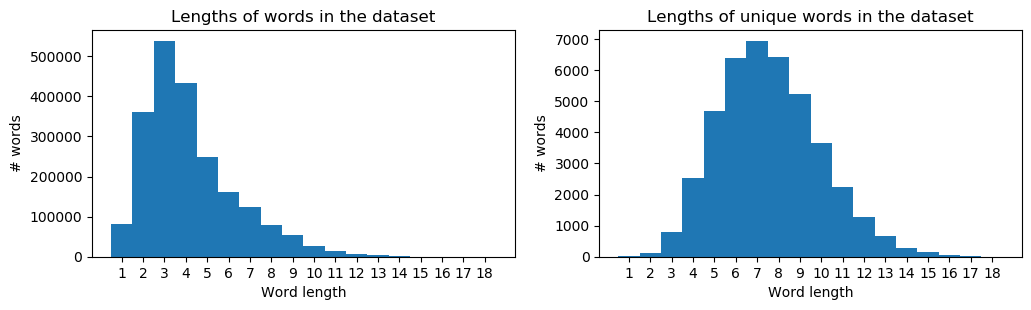

In [5]:
lengths = np.arange(1, 19)
unique_counts, _ = np.histogram([len(e) for e in words], bins=np.arange(1, 20))
counts, _ = np.histogram([len(e) for e in word_data], bins=np.arange(1, 20))


fig = plt.figure(figsize=(12, 3), dpi=100)
ax = fig.subplots(1, 2)
ax[0].bar(lengths, counts, width=1)
ax[0].set_xticks(lengths)
ax[0].set_title("Lengths of words in the dataset")
ax[0].set_xlabel("Word length")
ax[0].set_ylabel("# words")
ax[1].bar(lengths, unique_counts, width=1)
ax[1].set_xticks(lengths)
ax[1].set_title("Lengths of unique words in the dataset")
ax[1].set_xlabel("Word length")
ax[1].set_ylabel("# words")
fig.show()

## Creating a model

In [6]:
from ngram import NGramModel

In [7]:
austen_data = gutenberg.words(['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt'])
model = NGramModel(austen_data, 1)

print("Model:", model)

pred = model.predict_sequence(100)
print(" ".join(pred))

Model: 1-gram model with 11490 unique keys
be Her , of I there her Now , the , were all to better least are about been you apothecary of " She first had crossed owed pride could said too to well her about still this she the them . herself he cannot , was and helped forcing him 33 attention board She my The superior ; time I no his not not business would , be patroness sister ; easily uneasiness , ran between of the could ." , himself believed next but , on , Austen four brother They humour symptoms her the have had said


In [8]:
def join_and_beautify(predicted_words):
    ret = str()
    i = 0
    lastword = None
    for word in predicted_words:
        if lastword in ["." , "!", "?"]:
            ret += word.capitalize()
        else:
            ret += word.lower()
        i += len(word)
        if i > 80:
            ret += '\n'
            i = 0
        else:
            ret += ' '
        lastword = word
    for s in ["!", "?", ".", ",", ";", ":"]:
        ret = ret.replace(" "+s, s)
    ret = ret.replace(" ' ", "'")
    ret = ret.replace(" i ", " I ")
    return ret

print(join_and_beautify(pred))

be her, of I there her now, the, were all to better least are about been you apothecary of " she first
had crossed owed pride could said too to well her about still this she the them. Herself he cannot,
was and helped forcing him 33 attention board she my the superior; time I no his not not business would
, be patroness sister; easily uneasiness, ran between of the could.", himself believed next but
, on, austen four brother they humour symptoms her the have had said 


In [9]:
model = NGramModel(austen_data, 4)

print("Created a", model)
print(join_and_beautify(model.predict_sequence(300)))

Created a 4-gram model with 389276 unique keys
, and nearly turning his back to them all what they were about to behold; but instead of doing that,
she assured her, that her success was speedy, and for their sakes, than mortification for her own
welfare and happiness than all that a lover ought to look and say on such an errand." " he may have as
little to recommend them; and the hope strengthened when it was understood that he had been also addressing
her! On the contents of all. Her astonishment and confusion were very great -- and her temper excellent
in its power of censure, by bows or smiles -- mr. Knightley, were to be visited. Mary deplored the necessity
for herself. Harriet, necessarily drawn away by her dislike of mrs. Elton hardly waited for the affirmative
before she went on. " what can bring her here so often?" said marianne, " I hope I can allow for him. I
will fetch your greatcoat and open the garden door, and saw nothing, therefore, and subduing her
emotion, she turned t

## Shakespeare data


In [10]:
shakespeare_data = gutenberg.words(['shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt'])
model = NGramModel(shakespeare_data, 1)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(100)))

Model: 1-gram model with 8960 unique keys
bad t yong were poore.. Matter roome. Drop what trust seriuce not sacred vnderstood owne should venom
our as these ouer wilt tell but enter but that:? Them that from, blacke do shew cals o, roman.. A: your
neuer iewell indeed what in to, scena. Father did follow king,,: the, for to downe a againe is once
had me his fact son thee lecture?, most'such de, rose fortinbras stole the ( can within peale, next
my so not 


In [11]:
model = NGramModel(shakespeare_data, 4)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(300)))

Model: 4-gram model with 83491 unique keys
ophelia diuided from her selfe, and her selfe, whilest our poore mallice remaines in danger of her
former tooth. But let it be: horatio, or I sinke. I ( as aeneas, our great ancestor, did from the flames
of troy, vpon his shoulder the old anchyses beare ) so, from the bill, that writes them all alike: and
so of men. He loues no playes, as thou art in desire? Would'st thou haue laertes? Laer. A norman laer
. Vpon my sword marcell. We haue sworne my lord already ham. Indeed, vpon my sword, neuer to rise againe
: thy mothers poyson'd cup, it is not day: is not this something more then fantasie? What thinke you
on't, it hath made me mad. I say, my credit now stands on such slippery ground, that one of two bad wayes
you must conceit me, either a coward, or a batchellour? Then to answer euery man, directly and breefely
, wisely and truly: wisely I say, a cobler mur. But what in faith make you from wittenberg horatio?
Marcellus mar. My lord, I will e

## Bible (king james) data


In [12]:
bible_data = gutenberg.words(['bible-kjv.txt'])
model = NGramModel(bible_data, 1)

print("Model:", model)
print(join_and_beautify(model.predict_sequence(100)))

Model: 1-gram model with 13769 unique keys
pass lord generation the him get 27:, there glory your addeth 13 3: eat shalt 64 15 6 I said of is the woman
his among, portion and be not behold children; they with also then of israel, the according he guard
cause violent word, unto: tents; the hands border compassed old 23 praise thy cast the, puffeth:
land same, and in.. Shall he of the the 22 the saith the saying which edge inheritance.:, soul and sinners
the, come is after 


In [13]:
model = NGramModel(bible_data, 3)

print("Model:", model)
print(nice_join(model.predict_sequence(300)))

Model: 3-gram model with 444686 unique keys


NameError: name 'nice_join' is not defined

In [ ]:
#bad_words_url = "https://www.cs.cmu.edu/~biglou/resources/bad-words.txt"